Rerun the model after adding the hot encoded categorical variables as well as other numeric categroical variables (e.g. number of open complaintes)..


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler, OrdinalEncoder

In [2]:
data = pd.read_csv('marketing_customer_analysis_clean.csv')

In [3]:
data

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [196]:
data_numericals = data.select_dtypes(include="number")

In [4]:
X = data.drop("total_claim_amount", axis=1)

In [5]:
X

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize,A,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize,A,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,0.384256,7,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,0.384256,7,Personal Auto,Personal L1,Offer3,Web,Luxury Car,Medsize,A,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,0.000000,6,Personal Auto,Personal L3,Offer2,Branch,Four-Door Car,Medsize,A,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,0.000000,2,Corporate Auto,Corporate L3,Offer1,Web,Luxury SUV,Medsize,A,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,4.000000,6,Personal Auto,Personal L1,Offer1,Branch,SUV,Medsize,A,2


In [9]:
y = data[['total_claim_amount']]

In [16]:
categorical_columns = data.astype('category')

In [18]:
categorical_columns

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

In [203]:
#Standardize the data (after the data split!)

In [ ]:
# encode categorical values

In [17]:
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

ValueError: Boolean array expected for the condition, not category

In [12]:
scaler = StandardScaler()

In [13]:
scaler = scaler.fit(X_train)

ValueError: could not convert string to float: 'VW74085'

In [ ]:
scaled_data_X_train = scaler.transform(X_train)

In [207]:
scaled_data_X_train

array([[ 1.05625245e+00, -2.98648890e-01,  3.52458281e-01, ...,
         7.75180701e-03,  4.15700463e-01, -9.40879087e-01],
       [-9.26858346e-01, -3.92856956e-01, -1.23962932e+00, ...,
        -4.29233533e-01, -5.08688771e-04, -9.40879087e-01],
       [ 1.01608657e+00, -8.21583003e-01, -5.04791755e-01, ...,
        -4.29233533e-01, -8.32926993e-01, -9.40879087e-01],
       ...,
       [ 8.28964554e-01, -4.55120589e-01,  9.85263473e-01, ...,
        -4.29233533e-01,  2.49674622e+00,  1.06283582e+00],
       [ 4.77353686e-01,  1.95351558e+00, -1.23962932e+00, ...,
        -4.29233533e-01, -4.16717841e-01, -9.40879087e-01],
       [ 6.42188864e-02, -5.01884344e-01, -1.23962932e+00, ...,
        -4.29233533e-01,  2.49674622e+00,  1.06283582e+00]])

In [208]:
scaled_data_X_test = scaler.transform(X_test)
scaled_data_X_test

array([[-1.33521149e+00, -7.60433435e-01, -3.56162176e-01, ...,
        -4.29233533e-01, -8.32926993e-01,  1.06283582e+00],
       [-1.74037668e-04, -7.90734698e-01, -5.60556703e-01, ...,
         7.07990660e-01, -8.32926993e-01,  1.06283582e+00],
       [ 1.50381515e+00, -7.39859968e-02, -1.23962932e+00, ...,
        -4.29233533e-01,  2.08053707e+00, -9.40879087e-01],
       ...,
       [-6.32946088e-01, -1.81433873e-01, -1.23962932e+00, ...,
        -4.29233533e-01,  8.31909616e-01,  1.06283582e+00],
       [ 1.21213433e+00, -5.93347245e-01,  1.81207528e+00, ...,
        -4.29233533e-01, -8.32926993e-01,  1.06283582e+00],
       [ 1.59721677e+00,  5.09205519e-02,  1.18606345e+00, ...,
        -4.29233533e-01,  2.49674622e+00,  1.06283582e+00]])

In [209]:
# make a dataframe out of scaled_data_X_test 
# scaled_data_X_test = pd.DataFrame(scaled_data_X_test, columns = X_train.columns)

In [210]:
from sklearn.linear_model import LinearRegression

In [211]:
lm = LinearRegression()

In [212]:
model = lm.fit(scaled_data_X_train, y_train) #here we are creating our model 

In [213]:
model.coef_

array([[   0.64699307,   -4.01850007, -101.715123  ,  181.59872819,
          -1.35454955,   -4.97933472,   -2.41471714,    0.42409511,
          -0.85733405]])

In [214]:
model.intercept_

array([434.06224734])

In [215]:
# here i am testing the data to see if it works

In [216]:
y_pred = model.predict(scaled_data_X_test) #we let the model predict outcomes for the Data

In [217]:
# we see that the numbers are close to zero so the data is okay

In [218]:
y_pred

array([[358.14384661],
       [368.5184409 ],
       [635.38027509],
       ...,
       [577.55474938],
       [289.1849985 ],
       [377.91824228]])

In [219]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

In [220]:
mse

42442.785524751795

In [221]:
mse_unsquared = (mse)**0.5

In [222]:
mse_unsquared

206.0164690619461

In [223]:
#my mean squared error is quite low so the models predictions are close to the actual values

In [224]:
#make a real vs. predict dataframe

In [225]:
pd.DataFrame(y_pred)[0]

0       358.143847
1       368.518441
2       635.380275
3       260.986391
4       561.538016
           ...    
2723    345.142663
2724    640.772855
2725    577.554749
2726    289.184998
2727    377.918242
Name: 0, Length: 2728, dtype: float64

In [226]:
real_vs_pred = pd.DataFrame({'y_test': y_test['total_claim_amount'], 'y_pred':y_pred[:,0]})

In [227]:
real_vs_pred

,y_test,y_pred
1250,340.800000,358.143847
5438,195.153339,368.518441
10156,770.400000,635.380275
3441,336.000000,260.986391
682,561.600000,561.538016
...,...,...
5063,345.600000,345.142663
10053,664.280864,640.772855
3453,684.000000,577.554749
9241,25.713622,289.184998


Model Evaluation:
MSE.
RMSE.
MAE.
R2.
Adjusted R2.
Feature Importance.

In [228]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [229]:
scaled_data_X_test.shape

(2728, 9)

In [230]:
scaled_data_X_train.shape

(8182, 9)

In [231]:
X_train.shape

(8182, 9)

In [232]:
X_test.shape

(2728, 9)

In [233]:
scaled_data_X_test = pd.DataFrame(scaled_data_X_test, columns = X_train.columns)

In [234]:
scaled_data_X_train= pd.DataFrame(scaled_data_X_train, columns = X_train.columns)

In [235]:
scaled_data_X_test.shape

(2728, 9)

In [236]:
scaled_data_X_train.shape

(8182, 9)

In [237]:
y.shape

(10910, 1)

In [238]:
y_test.shape

(2728, 1)

In [239]:
y_train.shape

(8182, 1)

In [240]:
scaled_data_X_train = sm.add_constant(X_train.to_numpy())
model_1 = sm.OLS(y_train, scaled_data_X_train).fit()

predictions_train = model_1.predict(scaled_data_X_train)

scaled_data_X_train = sm.add_constant(X_test)
y_pred = model_1.predict(scaled_data_X_train)
print_model = model_1.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     total_claim_amount   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     966.0
Date:                Wed, 08 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:43:04   Log-Likelihood:                -55007.
No. Observations:                8182   AIC:                         1.100e+05
Df Residuals:                    8172   BIC:                         1.101e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.7227     11.903      7.286      0.000      63.390     110.056
x1             0.0002      0.001      0.291      0.771      -0.001       0.002
x2            -0.0006      0.000     -1.638      0.101      -0.001       0.000
x3            -0.0034   7.34e-05    -45.675      0.000      -0.003      -0.003
x4             5.2650      0.071     74.110      0.000       5.126       5.404
x5            -0.1388      0.228     -0.608      0.543      -0.586       0.309
x6            -0.1782      0.080     -2.235      0.025      -0.335      -0.022
x7            -2.7461      2.532     -1.085      0.278      -7.709       2.217
x8             0.1765      0.927      0.190      0.849      -1.640       1.993
x9            -1.7179      4.460     -0.385      0.700     -10.461       7.025
==============================================================================
Omnibus:                      725.140   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4003.339
Skew:                           0.234   Prob(JB):                         0.00
Kurtosis:                       6.395   Cond. No.                     2.68e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

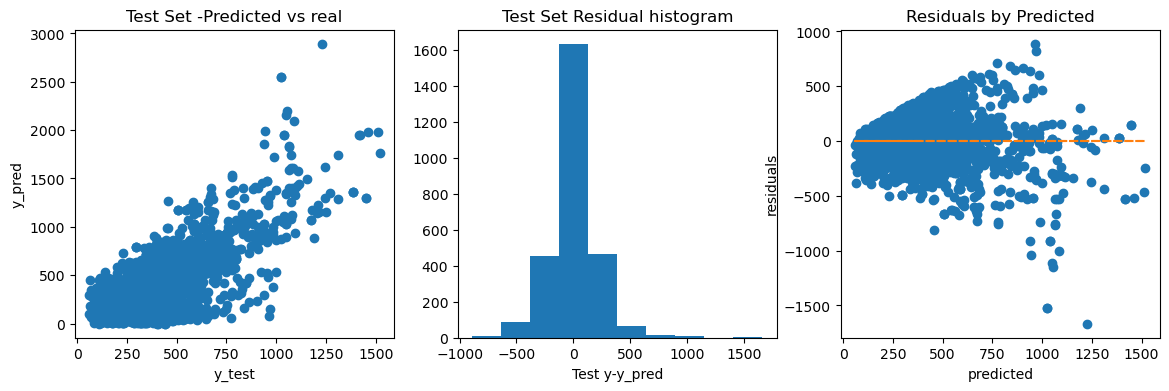

In [241]:
## Plot y_pred vs y_test
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test['total_claim_amount'], 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")


ax[1].hist(y_test['total_claim_amount'] - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,np.array(y_pred)-np.array(y_test['total_claim_amount']),"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [242]:
import statsmodels.api as sm

In [243]:
y_train.shape

(8182, 1)

In [244]:
model.coef_

array([[   0.64699307,   -4.01850007, -101.715123  ,  181.59872819,
          -1.35454955,   -4.97933472,   -2.41471714,    0.42409511,
          -0.85733405]])

In [246]:
coefficients = model.coef_.reshape(-1,1)

In [247]:
model.coef_

array([[   0.64699307,   -4.01850007, -101.715123  ,  181.59872819,
          -1.35454955,   -4.97933472,   -2.41471714,    0.42409511,
          -0.85733405]])

In [249]:
coefficients

array([[   0.64699307],
       [  -4.01850007],
       [-101.715123  ],
       [ 181.59872819],
       [  -1.35454955],
       [  -4.97933472],
       [  -2.41471714],
       [   0.42409511],
       [  -0.85733405]])

In [253]:
X

,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month
0,0,4809.216960,48029,61,7.000000,52,0.000000,9,2
1,1,2228.525238,0,64,3.000000,26,0.000000,1,1
2,2,14947.917300,22139,100,34.000000,31,0.000000,2,2
3,3,22332.439460,49078,97,10.000000,3,0.000000,2,1
4,4,9025.067525,23675,117,15.149071,31,0.384256,7,1
...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,15.149071,40,0.384256,7,1
10906,10906,5259.444853,61146,65,7.000000,68,0.000000,6,1
10907,10907,23893.304100,39837,201,11.000000,63,0.000000,2,2
10908,10908,11971.977650,64195,158,0.000000,27,4.000000,6,2


In [254]:
feature_importances = pd.DataFrame({'variable': X.columns, 'coefficient': coefficients[:, 0]})

In [255]:
feature_importances

,variable,coefficient
0,unnamed:_0,0.646993
1,customer_lifetime_value,-4.018500
2,income,-101.715123
3,monthly_premium_auto,181.598728
4,months_since_last_claim,-1.354550
5,months_since_policy_inception,-4.979335
6,number_of_open_complaints,-2.414717
7,number_of_policies,0.424095
8,month,-0.857334


In [257]:
import seaborn as sns

<Axes: xlabel='variable', ylabel='coefficient'>

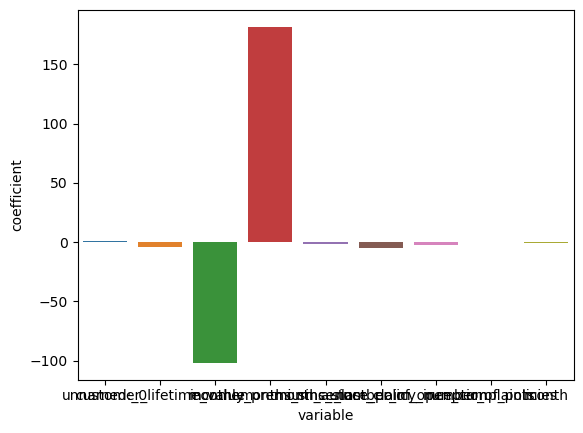

In [259]:
sns.barplot(x=feature_importances['variable'], y=feature_importances['coefficient'])

Rerun the model after adding the hot encoded categorical variables as well as other numeric categroical variables (e.g. number of open complaintes).
(Optional) Rerun the model after removing the outliers and compare the results using the R2.

In [19]:
categorical_columns = data.astype('category')

In [21]:
categorical_columns

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2
